# Exploration of some plotting utils

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import plotters
from PIL import Image, ImageFilter

im_pil = Image.open('docs/trinity.jpg')
im = np.array(im_pil)

# Set the image width. ~7 is good for a 13-inch screen
W = 7

# Scaling and displaying float images
Matplotlib's `imshow` works well for colour images which are 8-bit unsigned integers (i.e. in the range 0 to 255).

<IPython.core.display.Javascript object>


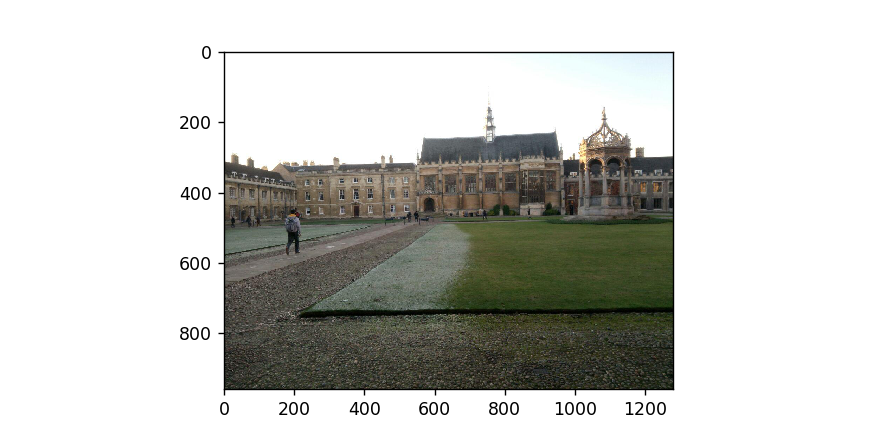

In [2]:
fig, ax = plt.subplots(1, num=1, figsize=(W,W/2))
ax.imshow(im)
plt.show()

It can also handle float arrays if they are monochrome, regardless of what scale the values have

<IPython.core.display.Javascript object>


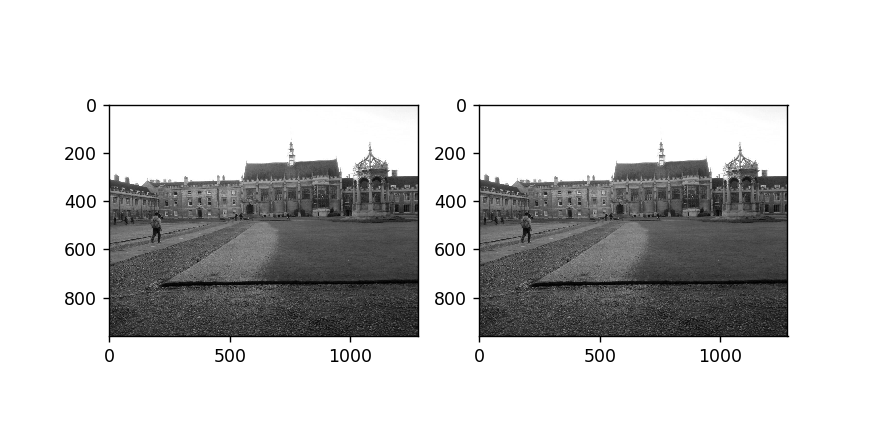

In [3]:
bw = im[:,:,1].astype('float')
bw2 = bw*0.1 - 50

fig, ax = plt.subplots(1, 2, num=2, figsize=(W,W/2))
ax[0].imshow(bw, cmap='gray')
ax[1].imshow(bw2, cmap='gray')
plt.show()

However floating 3 channel images have to be in the range 0 to 1. If not, you'll get a weird looking image

<IPython.core.display.Javascript object>


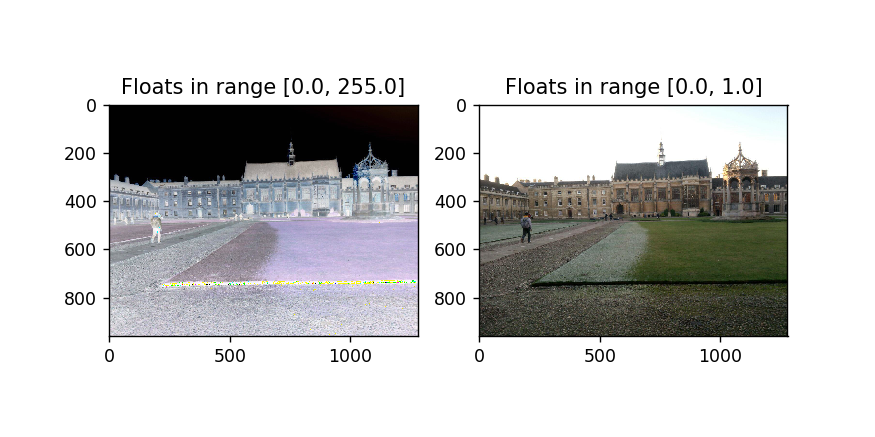

In [4]:
f_im = im.astype('float')
f_im2 = f_im / 255.0

fig, ax = plt.subplots(1, 2, num=3, figsize=(W,W/2))
ax[0].set_title('Floats in range [0.0, 255.0]')
ax[0].imshow(f_im, cmap='gray')
ax[1].set_title('Floats in range [0.0, 1.0]')
ax[1].imshow(f_im2, cmap='gray')
plt.show()

This leads us to the first function in the plotters module - `imshowNormalize`. This will take a colour input of any scale and scale it to be in the range 0 to 1

<IPython.core.display.Javascript object>


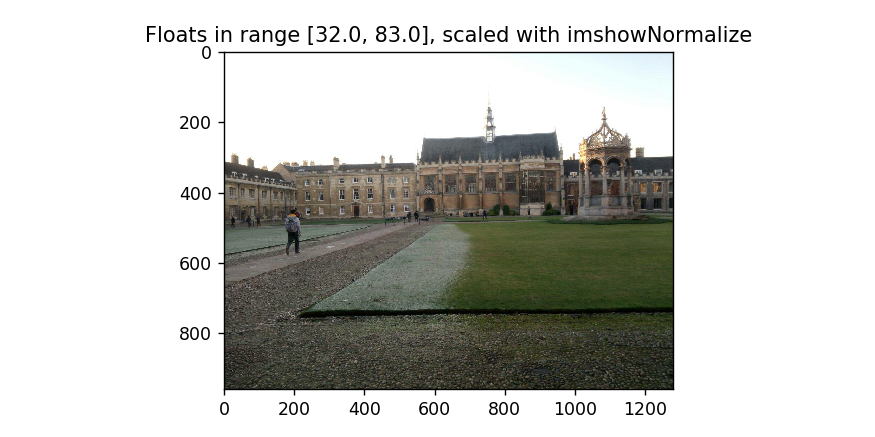

In [5]:
f_im = im.astype('float')
f_im = f_im * 0.2 + 32

fig, ax = plt.subplots(1, num=4, figsize=(W,W/2))
ax.imshow(plotters.imshowNormalize(f_im))
ax.set_title('Floats in range [32.0, 83.0], scaled with imshowNormalize')
plt.show()

Instead of calling this and then calling `imshow`, you can also call `plotters.imshow`, which will call it automatically for you. It also removes the tick labels and scales the image to fit the figure.

<IPython.core.display.Javascript object>


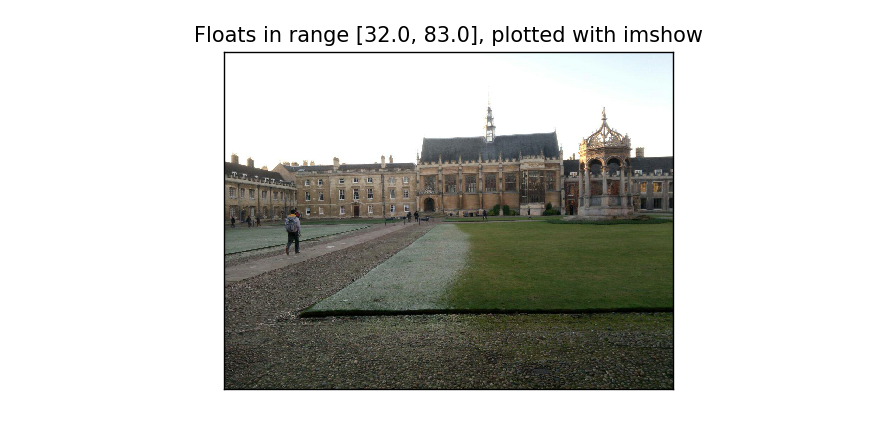

In [6]:
f_im = im.astype('float')
f_im = f_im * 0.2 + 32

fig, ax = plt.subplots(1, figsize=(W,W/2), num=5)
ax.set_title('Floats in range [32.0, 83.0], plotted with imshow')
plotters.imshow(f_im, ax)
plt.show()

# Side by Side Plotting
Let us blur an image to imitate a filtering operation we want to examine more closely.

<IPython.core.display.Javascript object>


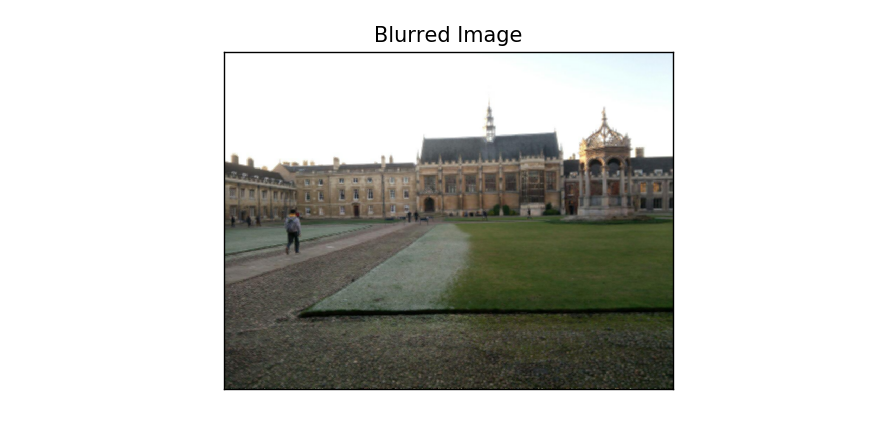

In [7]:
im1 = np.array(im_pil.filter(ImageFilter.BLUR))

fig, ax = plt.subplots(1, figsize=(W,W/2), num=6)
ax.set_title('Blurred Image')
plotters.imshow(im1, ax)
plt.show()

Plotting side by side isn't hard - we did it above with a call to `plt.subplots(1,2, ...)`. Again it does get annoying though having to worry about scaling if both images are floats; as well as removing the ticks and positioning them nicely. The `plotters.plot_sidebyside` function will handle this automatically.

<IPython.core.display.Javascript object>


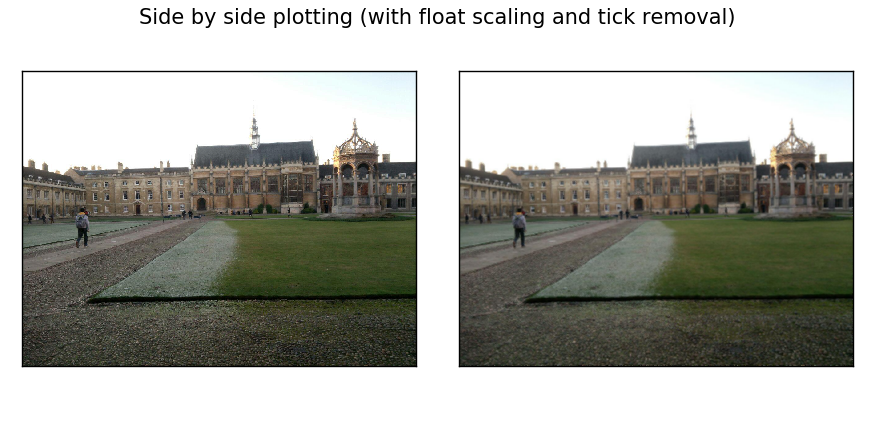

In [8]:
f_im1 = im1.astype('float') * 0.5 - 60
f_im = im.astype('float') * 0.3 + 100

fig, axes = plt.subplots(1, 2, figsize=(W,W/2), num=7)
fig.suptitle('Side by side plotting (with float scaling and tick removal)')
plotters.plot_sidebyside(f_im, f_im1, axes)
plt.show()

You can also zoom into a particular part of the image and display this side by side, again with all the extra convenience of handling floats nicely.

<IPython.core.display.Javascript object>


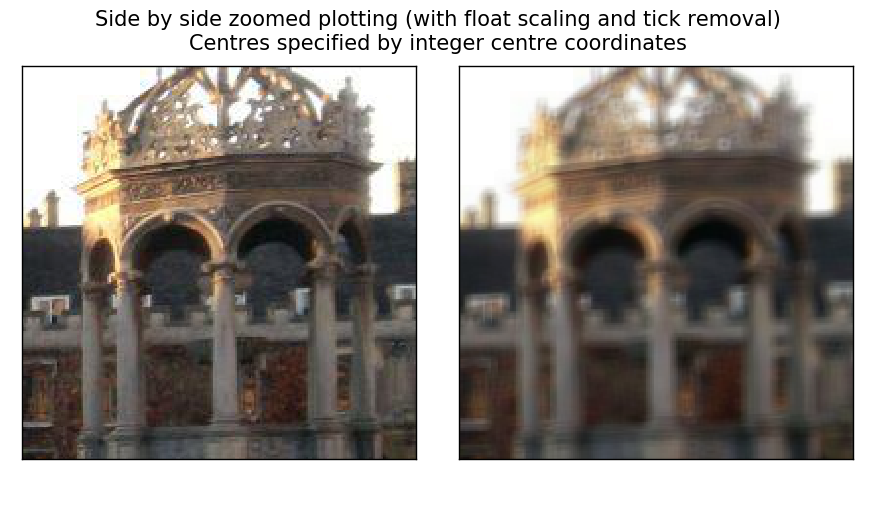

In [9]:
# Let us zoom in on the fountain. This is roughly at pixel location (325, 1080)
centre = (325, 1080)
fig, axes = plt.subplots(1, 2, figsize=(W,0.6*W), num=8)
fig.suptitle('Side by side zoomed plotting (with float scaling and tick removal)\n'+
             'Centres specified by integer centre coordinates')
plotters.zoom_sidebyside(f_im, f_im1, centre=centre, size=200, axes=axes)

You can also feed it centre positions in the range 0 to 1. The zoom_sidebyside function determines how to interpret the centre positions by whether they are ints (assumes pixel coords) or floats (assumes relative position)

<IPython.core.display.Javascript object>


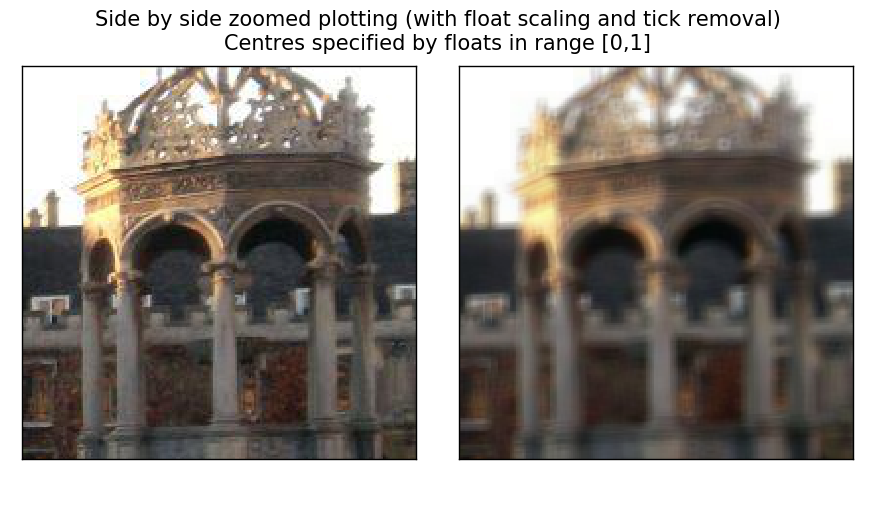

In [10]:
centre = (0.339, 0.844)
fig, axes = plt.subplots(1, 2, figsize=(W,0.6*W), num=9)
fig.suptitle('Side by side zoomed plotting (with float scaling and tick removal)\n'+
             'Centres specified by floats in range [0,1]')
plotters.zoom_sidebyside(f_im, f_im1, centre=centre, size=200, axes=axes)

# Displaying grids of data

## A 3d 'tensor' of images
This often happens in CNNs. You may want to examine an activation layer which may be $100 \times 100 \times 16$ say. We can view them as a grid of black and white images with the `plot_activations` function

In [11]:
# Simulate an array of activations - this next line grabs 16 patches from the 
# above image by randomly sampling a row position, col position and colour channel.
# We sample rows from 300 onwards to avoid all the sky in the image
rows = np.random.randint(300, im1.shape[0]-50, size=(16,)) 
cols = np.random.randint(50, im1.shape[1]-50, size=(16,))
channels = np.random.randint(0, 3, size=(16,))
acts = [im[r-50:r+50,c-50:c+50,ch] for r,c,ch in zip(rows, cols, channels)]

# Convert the list to a numpy array by stacking the elements
acts = np.stack(acts, axis=-1)
acts.shape

(100, 100, 16)

<IPython.core.display.Javascript object>


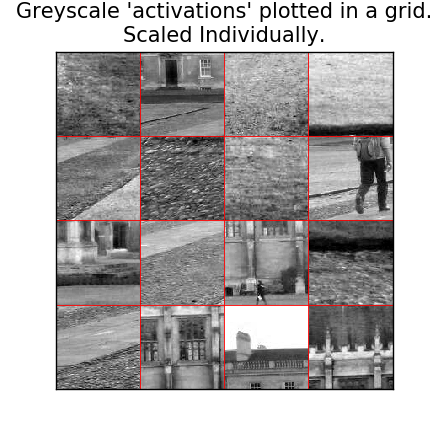

In [12]:
fig, ax = plt.subplots(1, figsize=(W/2,W/2), num=10)
ax.set_title("Greyscale 'activations' plotted in a grid.\nScaled Individually.")
plotters.plot_activations(acts, cols=4, draw=True, ax=ax);

By default, all of the images will be scaled individually, but you may not want to do this. You can change this behaviour by scaling the image as a whole.

<IPython.core.display.Javascript object>


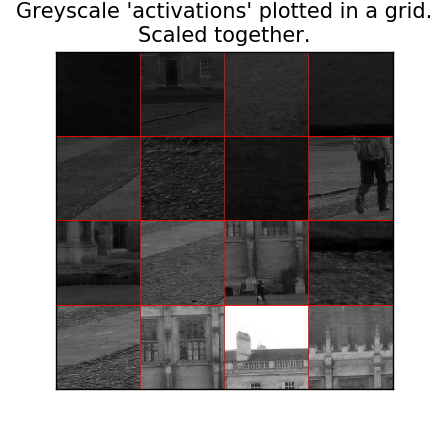

In [13]:
acts = acts * np.linspace(0.2, 0.8, 16)

fig, ax = plt.subplots(1, figsize=(W/2,W/2), num=11)
ax.set_title("Greyscale 'activations' plotted in a grid.\nScaled together.")
plotters.plot_activations(acts, cols=4, draw=True, scale_individual=False, ax=ax);

## A 4d 'tensor' (a batch of colour images)
It often happens that I will want to look at a batch of RGB images (e.g reconstructions from activations in a CNN). I.e. we will have an array of shape [N, H, W, 3], and I'll want to view all of these as a grid. To do this, we can use `plotters.plot_batch_colour`.

In [14]:
# Simulate an array of colour patches - this next line grabs 16 patches from the 
# above image by randomly sampling a row position and col position.
# We sample rows from 300 onwards to avoid all the sky in the image
rows = np.random.randint(300, im1.shape[0]-50, size=(16,)) 
cols = np.random.randint(50, im1.shape[1]-50, size=(16,))
acts = [im[r-50:r+50,c-50:c+50,:] for r,c in zip(rows, cols)]

# Convert the list to a numpy array by stacking the elements
batch = np.stack(acts, axis=0)
batch.shape

(16, 100, 100, 3)

<IPython.core.display.Javascript object>


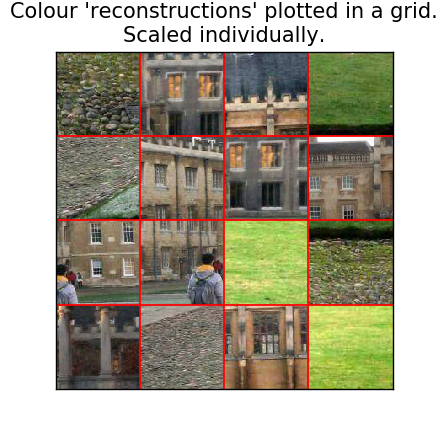

In [15]:
fig, ax = plt.subplots(1, figsize=(W/2,W/2), num=12)
ax.set_title("Colour 'reconstructions' plotted in a grid.\nScaled individually.")
plotters.plot_batch_colour(batch, cols=4, draw=True, ax=ax);

Again, we can scale the images individually (as above) or as a whole (below)

<IPython.core.display.Javascript object>


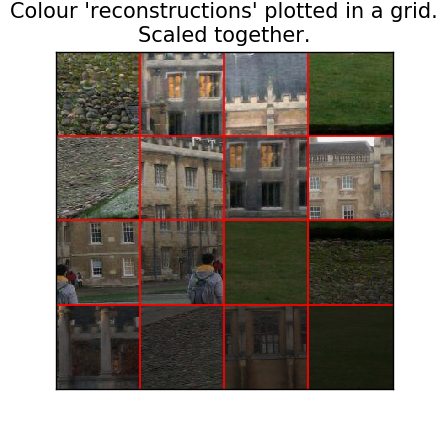

In [16]:
batch2 = batch * np.reshape(np.linspace(0.8, 0.2, 16), [16, 1, 1, 1])

fig, ax = plt.subplots(1, figsize=(W/2,W/2), num=13)
ax.set_title("Colour 'reconstructions' plotted in a grid.\nScaled together.")
plotters.plot_batch_colour(batch2, cols=4, draw=True, scale_individual=False, ax=ax);

## Zooming in on a 4d array of images
Say we wanted to look at the centre point of all of these 16 images. We can do use `plotters.zoom_batch_colour`. To plot them, we can then use the above plotting methods.

<IPython.core.display.Javascript object>


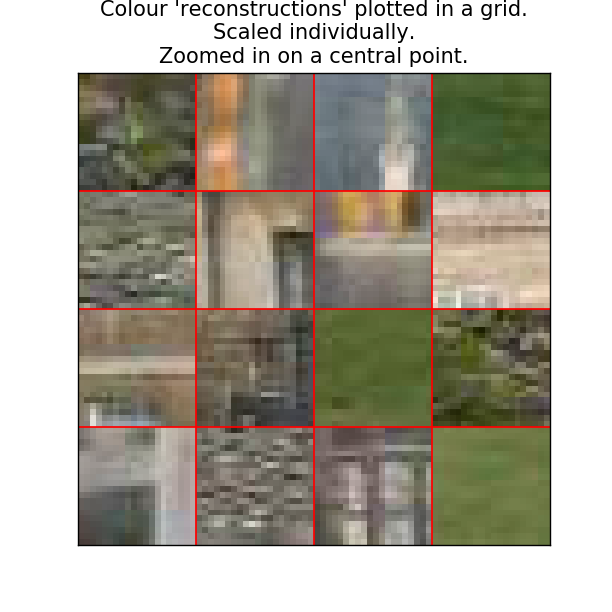

In [17]:
centre = (0.4, 0.5) # can also feed in an array of size (16,2) to specify centre 
                    # locations for each image
batch2 = plotters.zoom_batch_colour(batch, (0.4, 0.5), size=20)

fig, ax = plt.subplots(1, figsize=(0.7*W,0.7*W), num=14)
ax.set_title("Colour 'reconstructions' plotted in a grid.\nScaled individually.\n"
             "Zoomed in on a central point.")
plotters.plot_batch_colour(batch2, cols=4, draw=True, scale_individual=False, ax=ax);

## Creating a grid of axes to plot individually to
An alternative to the above method of plotting multiple images (internally, this creates one large big image and plots it on a single axis) is to create mutliple axes and plot to them manually. Matplotlib provides the gridspec package to help you do this. I do this often so I've created the function `plot_axgrid` to give me axis handles. You can feed it all the standard figure keyword args like figsize and num too.

In [18]:
def plot_axgrid(h, w, top=1, **kwargs):
    """ Create a grid of axes of size h x w

    Creates a figure with tight layout and thin black borders between images.
    Useful for plotting groups of activations

    Parameters
    ----------
    h : int
        Number of rows in the grid.
    w : int
        Number of cols in the grid.
    top : float
        How high up the axes should go (useful in case you want space for a title)
    kwargs : (key, val) pairs
        :py:class:`matplotlib.figure.Figure` keyword args.

    Returns
    -------
    fig : :py:class:`matplotlib.figure.Figure`
    axes : :py:class:`matplotlib.axes.Axes`
    """
    space = 0.02
    default_args = {
        'facecolor': 'k'
    }
    for key, val in kwargs.items():
        default_args[key] = val

    fig, axes = plt.subplots(
        h, w, **default_args,
        subplot_kw={'xticks': [], 'yticks': []},
        gridspec_kw={'hspace': space, 'wspace': space, 'left': space,
                     'bottom': space, 'top': top - space, 'right': 1 - space})
    
    return fig, axes

<IPython.core.display.Javascript object>


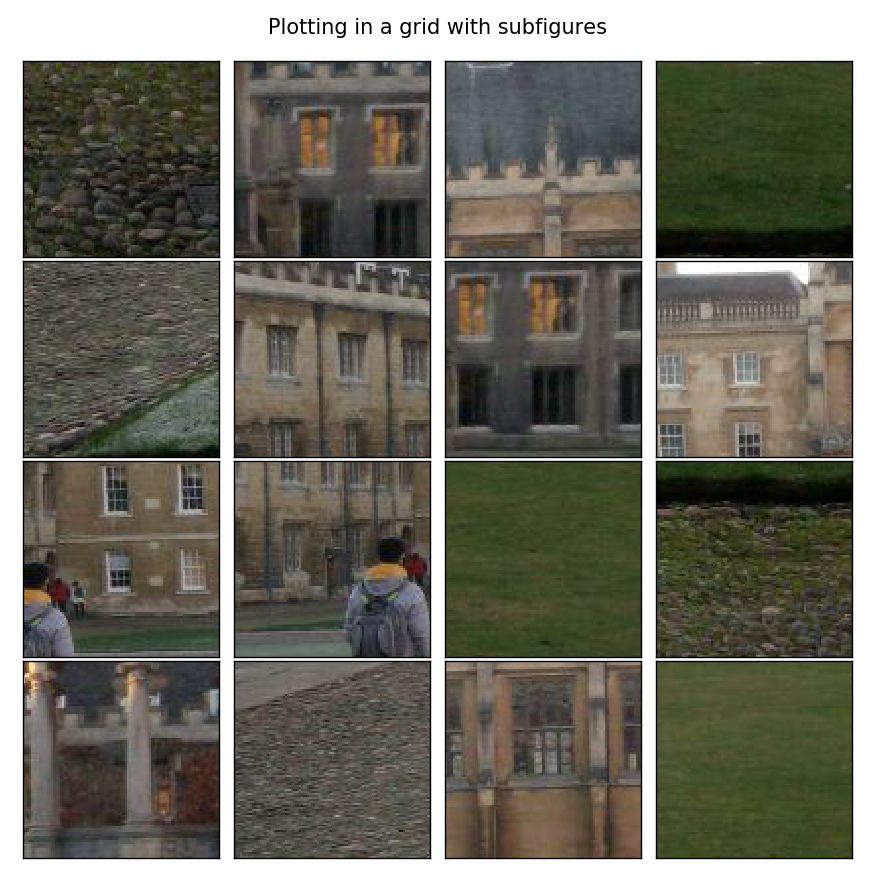

In [19]:
fig, axes= plotters.plot_axgrid(4,4, top=0.95, figsize=(W,W), num=15)
fig.suptitle('Plotting in a grid with subfigures')

for i in range(4):
    for j in range(4):
        axes[i][j].imshow(batch[i*4+j])